In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df= pd.read_csv('fedex.csv')
df.head(20)

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
5,2008,1,3,4,1940.0,1915,2110,WN,378,115.0,25.0,IND,JAX,688,1.0
6,2008,1,3,4,1937.0,1830,1940,WN,509,250.0,67.0,IND,LAS,1591,1.0
7,2008,1,3,4,1039.0,1040,1150,WN,535,250.0,-1.0,IND,LAS,1591,0.0
8,2008,1,3,4,617.0,615,650,WN,11,95.0,2.0,IND,MCI,451,0.0
9,2008,1,3,4,1620.0,1620,1655,WN,810,95.0,0.0,IND,MCI,451,0.0


In [3]:
df.shape

(3604175, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [5]:
#avg = df['Shipment_Delay'].mean()
#df['Actual_Shipment_Time'].fillna(df['Planned_Shipment_Time'] + avg, inplace=True)

#df['Actual_Shipment_Time'] = df['Actual_Shipment_Time'].fillna(df['Planned_Shipment_Time'] + avg)

#---------Shipment_Delay-------------
#df['Shipment_Delay'].fillna(df['Shipment_Delay'].median(), inplace = True)

#df['Shipment_Delay'] = df['Shipment_Delay'].fillna(df['Shipment_Delay'].median())

#---------Delivery_status-------------
#df['Delivery_Status'].fillna(df['Delivery_Status'].mode()[0], inplace=True)

#df['Delivery_Status'] = df['Delivery_Status'].fillna(df['Delivery_Status'].mode()[0])


#print(df['Shipment_Delay'].isna().sum())     -- null count 81602  


#print(df['Shipment_Delay'].dtype)       --float64

In [6]:
#df['Shipment_Delay'].fillna(df['Shipment_Delay'].median(), inplace=True)

df['Shipment_Delay'] = df['Shipment_Delay'].fillna(df['Shipment_Delay'].median())
print(df['Shipment_Delay'].isna().sum())


0


In [7]:
df['Actual_Shipment_Time'] = df['Actual_Shipment_Time'].fillna(df['Planned_Shipment_Time'] + df['Shipment_Delay'])
print(df['Actual_Shipment_Time'].isna().sum())

0


In [8]:
#df['Delivery_Status'].fillna(df['Delivery_Status'].mode()[0], inplace=True)

df['Delivery_Status'] = df['Delivery_Status'].fillna(df['Delivery_Status'].mode()[0])

In [9]:
#df['Planned_TimeofTravel'].fillna(df['Planned_TimeofTravel'].median(), inplace=True)

df['Planned_TimeofTravel'] = df['Planned_TimeofTravel'].fillna(df['Planned_TimeofTravel'].median())

#--------mean
#df['Planned_TimeofTravel'] = df['Planned_TimeofTravel'].fillna(df['Planned_TimeofTravel'].mean())

In [10]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [12]:
#type casting
df['Actual_Shipment_Time'] = df['Actual_Shipment_Time'].astype('int64')
df['Planned_TimeofTravel'] = df['Planned_TimeofTravel'].astype('int64')
df['Shipment_Delay'] = df['Shipment_Delay'].astype('int64')
df['Delivery_Status'] = df['Delivery_Status'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Year                   int64 
 1   Month                  int64 
 2   DayofMonth             int64 
 3   DayOfWeek              int64 
 4   Actual_Shipment_Time   int64 
 5   Planned_Shipment_Time  int64 
 6   Planned_Delivery_Time  int64 
 7   Carrier_Name           object
 8   Carrier_Num            int64 
 9   Planned_TimeofTravel   int64 
 10  Shipment_Delay         int64 
 11  Source                 object
 12  Destination            object
 13  Distance               int64 
 14  Delivery_Status        int64 
dtypes: int64(12), object(3)
memory usage: 412.5+ MB


In [14]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003,1955,2225,WN,335,150,8,IAD,TPA,810,0
1,2008,1,3,4,754,735,1000,WN,3231,145,19,IAD,TPA,810,1
2,2008,1,3,4,628,620,750,WN,448,90,8,IND,BWI,515,0
3,2008,1,3,4,926,930,1100,WN,1746,90,-4,IND,BWI,515,0
4,2008,1,3,4,1829,1755,1925,WN,3920,90,34,IND,BWI,515,1


In [15]:
df.shape

(3604175, 15)

In [16]:
duplicate = df.duplicated().sum()
print(duplicate)

4


In [17]:
df = df.drop_duplicates()
print(df.shape)

(3604171, 15)


In [18]:
print(df.duplicated().sum())

0


In [22]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604171.0,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06,3.604171e+06
mean,2008.0,3.514944e+00,1.568480e+01,3.934604e+00,1.339309e+03,1.329370e+03,1.495304e+03,2.223797e+03,1.291575e+02,1.088363e+01,7.280911e+02,1.992725e-01
std,0.0,1.709912e+00,8.763328e+00,1.987127e+00,4.808675e+02,4.664365e+02,4.854826e+02,1.944583e+03,6.950520e+01,3.582256e+01,5.611319e+02,3.994534e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


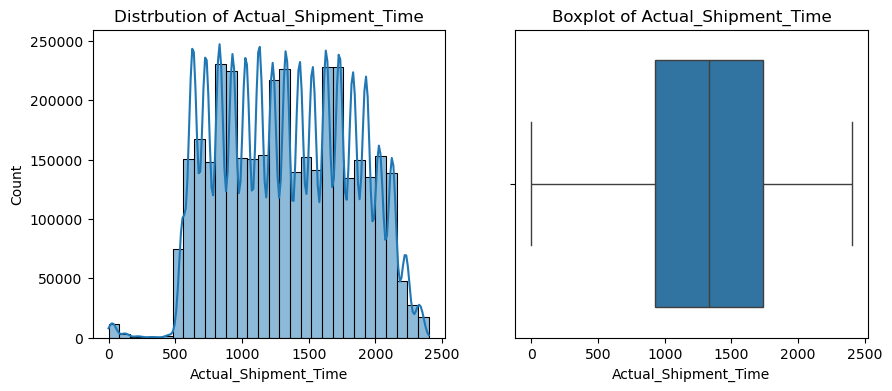

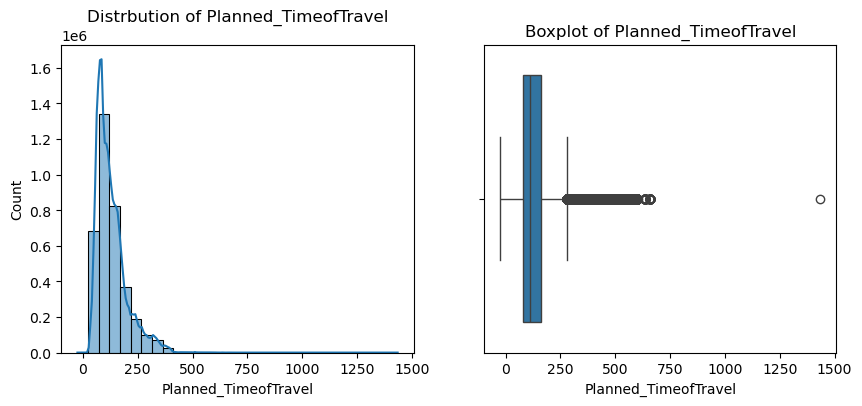

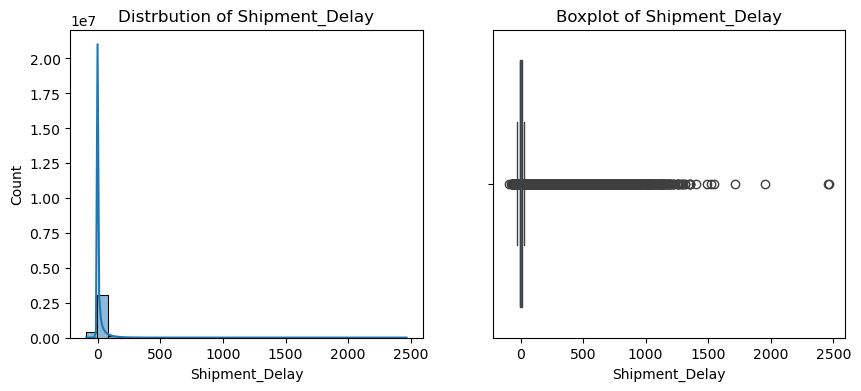

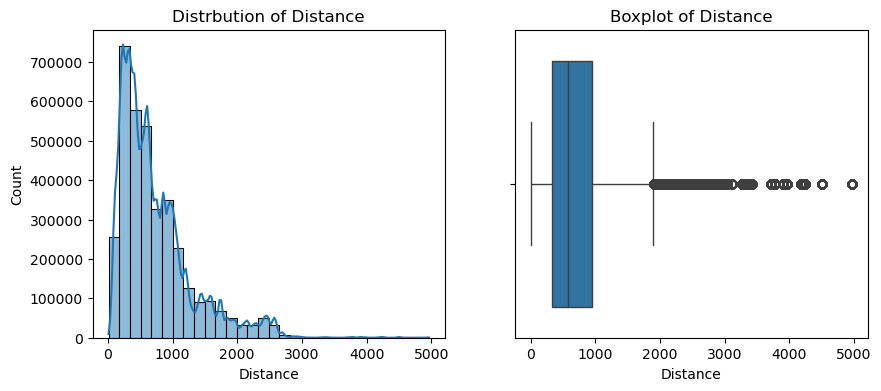

In [21]:
#check outliers
num_cols = ['Actual_Shipment_Time', 'Planned_TimeofTravel', 'Shipment_Delay', 'Distance']

for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distrbution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

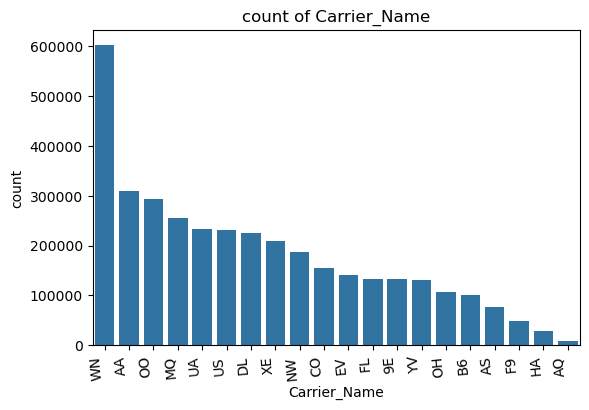

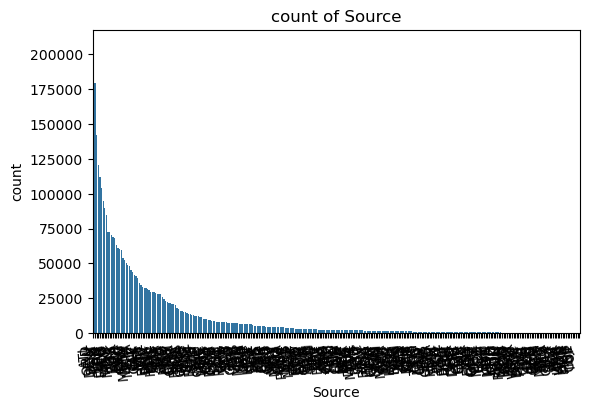

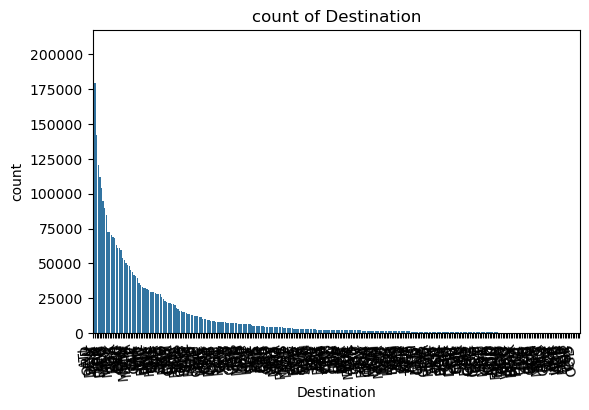

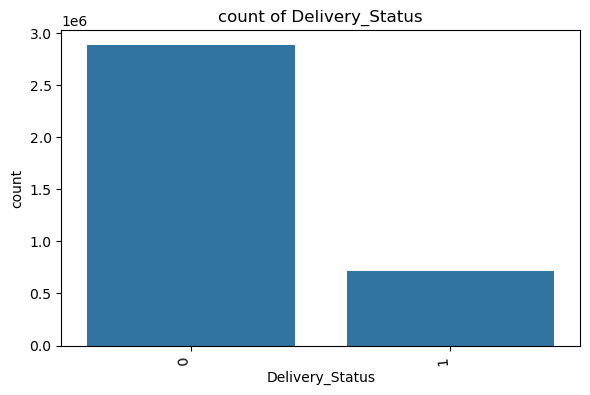

In [36]:
cat_cols = ['Carrier_Name', 'Source', 'Destination', 'Delivery_Status']


for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,  x= col, order=df[col].value_counts().index)
    plt.xticks(rotation=95, ha='right')
    plt.tight_layout()
    plt.title(f'count of {col}')
    plt.show()